        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Spring 2022</h1>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [9]:
pip install -U pip setuptools wheel
pip install -U 'spacy[transformers,lookups,apple]'
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (1672553895.py, line 1)

In [2]:
df = pd.read_csv("movie_story_student_file.csv")
df_movie = pd.read_csv('movies.csv')

print("Number of data points in story df:",df.shape[0])
print("Number of data points in movie genre df:",df_movie.shape[0])

Number of data points in story df: 20000
Number of data points in movie genre df: 23498


In [3]:
df.head()

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...


In [4]:
x = df.rename(columns={"movie_id": "id"})

In [5]:
df_movie.head()

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller


In [6]:
y = df_movie.rename(columns={"movieId": "id"})

In [7]:
x.head()

,id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...


In [8]:
df_cd = pd.merge(x, y, how='inner', left_on = 'id', right_on = 'id')

In [9]:
df_cd.head()

,id,story,title,genres
0,131072,A girl who always tends to fall in love with t...,Jesus liebt mich (2012),Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Bigfoot The Movie (2015),Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Mount St. Elias (2009),Documentary
3,196611,"In her first special since 2003, Ellen revisit...",Ellen DeGeneres: Relatable (2018),Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,Party Central (2014),Animation|Children|Comedy|Fantasy


In [10]:
df_cd.shape

(20000, 4)

In [11]:
df_cd.notnull()

,id,story,title,genres
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
19995,True,True,True,True
19996,True,True,True,True
19997,True,True,True,True
19998,True,True,True,True


In [12]:
df_cd['story'].str.len()

0        125
1        860
2        272
3        151
4        351
        ... 
19995    460
19996    393
19997    203
19998    458
19999    214
Name: story, Length: 20000, dtype: int64

In [13]:
nan_values = df_cd[df_cd.isna().any(axis=1)]


In [14]:
print(nan_values)

Empty DataFrame
Columns: [id, story, title, genres]
Index: []


In [15]:
mask = df_cd[['story']].applymap(lambda x: len(str(x)) <= 10)

#Here you can just use the mask to filter your rows, using the method *.all()* to filter only rows that are all True, but you could also use the *.any()* method for other needs
df_len = df_cd[mask.all(axis=1)]
print(df_len)

Empty DataFrame
Columns: [id, story, title, genres]
Index: []


In [16]:
miss_df = df_cd[df_cd['genres'] == '(no genres listed)']
print(miss_df)

           id                                              story  \
17     196641  In the months following the terrorist attacks ...   
35     196675  A 30 years odyssey: the world\'s most intrigui...   
53     131172  A man, his dog, a young woman and a filmmaker ...   
108    196861  Russian Federation, December 31, 1999. After P...   
148    196959  I Am JFK Jr. - A Tribute to a Good Man is an h...   
...       ...                                                ...   
19865  187549  They\'re called water carriers, domestics, \'g...   
19926  187689  Filmed and recorded towards the tail end of \'...   
19928  187693  In the autumn of 2003 Iron Maiden performed th...   
19929  187697  When the \'Big Four,\' Metallica, Slayer, Mega...   
19933  187713  Inspired by one of the longest and bloodiest r...   

                                                   title              genres  
17                                Young and Alive (2018)  (no genres listed)  
35     Why Are We Creativ

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  20000 non-null  int64 
 1   story     20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [18]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23498 entries, 0 to 23497
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  23498 non-null  int64 
 1   title    23498 non-null  object
 2   genres   23498 non-null  object
dtypes: int64(1), object(2)
memory usage: 550.9+ KB


In [19]:
df_cd[df_cd.isnull().any(axis=1)]

,id,story,title,genres


In [20]:
stry = pd.Series(df_cd['story'].tolist())
unique_stry = len(np.unique(stry))
qs_morethan_onetime = np.sum(stry.value_counts() > 1)
print ('Total number of  Unique stories are: {}\n'.format(unique_stry))
#print len(np.unique(qids))

print ('Number of unique stories that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_stry*100))

print ('Max number of times a single story is repeated: {}\n'.format(max(stry.value_counts()))) 

q_vals=stry.value_counts()

q_vals=q_vals.values

Total number of  Unique stories are: 19968

Number of unique stories that appear more than one time: 16 (0.08012820512820512%)

Max number of times a single story is repeated: 18



In [21]:
genres_list = []
for i in df_movie['genres'].unique():
    if '|' in i:
        temp = i.split('|')
        genres_list.extend(temp)
    else:
        genres_list.append(i)
genres_set = set(genres_list)
genres_dict = {genre: 0 for genre in genres_set}
genres_dict

{'Horror': 0,
 '(no genres listed)': 0,
 'Fantasy': 0,
 'Drama': 0,
 'Crime': 0,
 'Film-Noir': 0,
 'Mystery': 0,
 'Documentary': 0,
 'Adventure': 0,
 'Thriller': 0,
 'Animation': 0,
 'Action': 0,
 'Musical': 0,
 'Romance': 0,
 'Western': 0,
 'Comedy': 0,
 'IMAX': 0,
 'Children': 0,
 'War': 0,
 'Sci-Fi': 0}

                     0     1
0               Horror  2587
1   (no genres listed)  1310
2              Fantasy  1056
3                Drama  9835
4                Crime  1711
5            Film-Noir    18
6              Mystery  1102
7          Documentary  3247
8            Adventure  1390
9             Thriller  4027
10           Animation  1150
11              Action  2766
12             Musical   214
13             Romance  2601
14             Western   143
15              Comedy  6141
16                IMAX   159
17            Children  1083
18                 War   488
19              Sci-Fi  1424


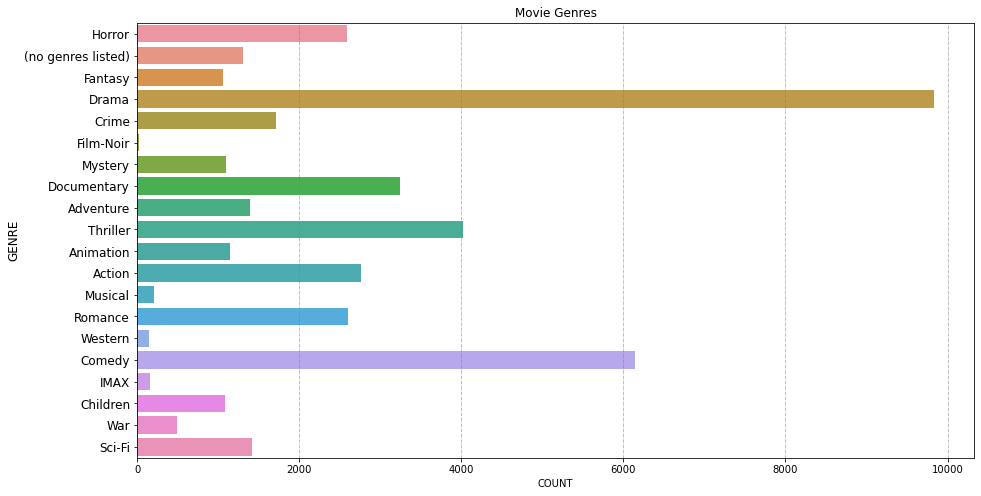

In [22]:
for genre in genres_dict.keys():
    for list_genres in df_movie['genres'].values:
        if genre in list_genres:
            genres_dict[genre] += 1
        else:
            continue
genres_df = pd.DataFrame(genres_dict.items())
print(genres_df)

plt.figure(figsize=(15,8))
col_map = plt.get_cmap('Dark2')

plt.title("Movie Genres")

plt.grid(color = 'gray', linestyle = '-.', linewidth = 0.5)
plots = sns.barplot(x=1, y=0, data=genres_df)
plt.ylabel("GENRE",fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("COUNT")
plt.show()


In [23]:
df_movie.shape

(23498, 3)

In [24]:
#temp_dataset = df.set_index("movie_id").join(df_movie.set_index("movieId"),how="outer").reset_index()                
df_cd['DramaGenre'] = df_cd['genres'].str.get_dummies()['Drama']
df_cd

,id,story,title,genres,DramaGenre
0,131072,A girl who always tends to fall in love with t...,Jesus liebt mich (2012),Comedy,0
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Bigfoot The Movie (2015),Comedy|Horror,0
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Mount St. Elias (2009),Documentary,0
3,196611,"In her first special since 2003, Ellen revisit...",Ellen DeGeneres: Relatable (2018),Comedy,0
4,196613,Mike and Sulley are back at Monsters Universit...,Party Central (2014),Animation|Children|Comedy|Fantasy,0
...,...,...,...,...,...
19995,56801,The iconic creatures from two of the scariest ...,AVPR: Aliens vs. Predator - Requiem (2007),Action|Horror|Sci-Fi,0
19996,122337,When a bored-with-life English teacher meets a...,Love N' Dancing (2009),Drama|Romance,1
19997,187875,Herbert Blount is a crowdfunding contributor f...,Director's Cut (2018),Horror,0
19998,187873,REAL BOY is the coming-of-age story of Bennett...,Real Boy (2016),Documentary,0


In [25]:
# To get only 'Comedy' and not mixture with any other genres
#df_cd = df_cd[df_cd['story'] == 'Drama'].drop(columns=['title', 'genres'], axis=1)


In [26]:
main_dataset = df_cd.drop(columns=['title', 'genres'], axis=1)
main_dataset['DramaGenre'].value_counts()
main_dataset.rename({'index': 'movie_id', 'DramaGenre': 'Drama'}, inplace=True)
main_dataset

,id,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,196609,"Bigfoot has come to the town of Ellwood City, ...",0
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",0
3,196611,"In her first special since 2003, Ellen revisit...",0
4,196613,Mike and Sulley are back at Monsters Universit...,0
...,...,...,...
19995,56801,The iconic creatures from two of the scariest ...,0
19996,122337,When a bored-with-life English teacher meets a...,1
19997,187875,Herbert Blount is a crowdfunding contributor f...,0
19998,187873,REAL BOY is the coming-of-age story of Bennett...,0


In [27]:
main_dataset[main_dataset['DramaGenre'] == 1]

,id,story,DramaGenre
11,196631,The tense marriage between two painters is sha...,1
14,196637,Three estranged sisters deal with the death of...,1
15,65567,"After a plane crash, a young therapist, Claire...",1
16,196639,How do we cope with the unthinkable? Tuva Novo...,1
25,131122,Love Exposure explores the very roots of femal...,1
...,...,...,...
19986,187859,"Dramatic comedy about having fun, throwing you...",1
19988,122329,"Waldemar Nods, a young man from Suriname, meet...",1
19989,187865,"The story of a busy man, who fills his time tr...",1
19993,187869,Young Pooja lives with her mother in a village...,1


In [28]:
main_dataset['story'].isnull().values.any()

False

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np

import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
#from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
from tqdm import tqdm

In [164]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub("\S*\d\S*", "", x).strip()
    x = re.sub('[^A-Za-z0-9]+', ' ', x)
    x = re.sub(r'[?|!|\'|"|#]', r'', x)
    x = re.sub(r'[.|,|)|(|\|/]', r' ', x)
    x = re.sub(r"http\S+", "", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [165]:
def extract_features(df):
    # preprocessing each question
    main_dataset["story"] = main_dataset["story"].fillna("").apply(preprocess)
    return main_dataset

In [166]:
main_dataset = extract_features(main_dataset)
main_dataset

,id,story,DramaGenre,len_char,q1_feats_m
0,131072,a girl who always tends to fall in love with t...,0,125,"[-4.796729097142816, 24.74476881325245, -8.909..."
1,196609,bigfoot has come to the town of ellwood city p...,0,743,"[21.82820137962699, 1.554396502673626, -49.972..."
2,131074,at an altitude of feet alaska own mount st eli...,0,262,"[31.798704996705055, 6.985954738222063, -34.58..."
3,196611,in her first special since ellen revisits her ...,0,140,"[6.124237842857838, 23.935650505125523, -7.412..."
4,196613,mike and sulley are back at monsters universit...,0,292,"[-3.0039108768105507, 1.8803184553980827, -16...."
...,...,...,...,...,...
19995,56801,the iconic creatures from two of the scariest ...,0,416,"[18.28707494214177, -43.57015726715326, -47.98..."
19996,122337,when a bored with life english teacher meets a...,1,385,"[-6.285231424961239, 34.54715814907104, -37.84..."
19997,187875,herbert blount is a crowdfunding contributor f...,0,200,"[-14.137412928044796, 12.381910420954227, 8.74..."
19998,187873,real boy is the coming of age story of bennett...,0,448,"[-0.11695077922195196, 52.724672082811594, -12..."


In [167]:
main_dataset_drama = main_dataset[main_dataset['DramaGenre'] == 1]
main_dataset_nondrama = main_dataset[main_dataset['DramaGenre'] == 0]


# Converting 2d array of q1 and q2 and flatten the array: like {{1,21},{3,4}} to {1,2,3,4}
p = main_dataset_drama["story"].to_numpy().flatten()
n = main_dataset_nondrama["story"].to_numpy().flatten()

print ("Number of data points in class 1  :",len(p))
print ("Number of data points in class 0  :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1  : 8412
Number of data points in class 0  : 11588


In [168]:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in drama genre :",len(textp_w))
print ("Total number of words in nondrama genre :",len(textn_w))

Total number of words in drama genre : 2491943
Total number of words in nondrama genre : 3593005


Word Cloud for Duplicate Question pairs


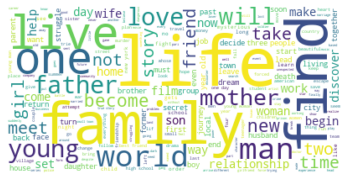

In [169]:
wc = WordCloud(background_color="white",max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-Duplicate Question pairs:


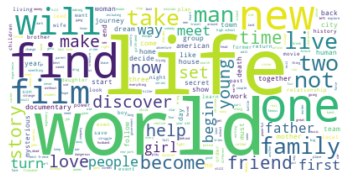

In [170]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

array([[<AxesSubplot:title={'center':'len_char'}>]], dtype=object)

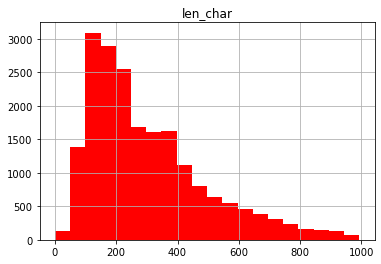

In [171]:
main_dataset['len_char'] = main_dataset.story.apply(lambda x: len(x))
main_dataset.hist(column = 'len_char', bins = 20,color='red')

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

# [4] Featurization

## [4.1] BAG OF WORDS

## [4.2] Bi-Grams and n-Grams.

## [4.3] TF-IDF

## [4.4] Word2Vec

In [173]:
!python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
!python -m spacy download en

2022-05-02 08:50:57.118147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-02 08:50:57.118217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-05-02 08:51:08.583368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-02 08:51:08.583425: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [174]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_lg')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(main_dataset['story'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1.vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
main_dataset['q1_feats_m'] = list(vecs1)

100%|██████████| 20000/20000 [04:10<00:00, 79.74it/s]


In [176]:
main_dataset.head()

,id,story,DramaGenre,len_char,q1_feats_m
0,131072,a girl who always tends to fall in love with t...,0,124,"[-4.796729097142816, 24.74476881325245, -8.909..."
1,196609,bigfoot has come to the town of ellwood city p...,0,743,"[21.82820137962699, 1.554396502673626, -49.972..."
2,131074,at an altitude of feet alaska own mount st eli...,0,257,"[27.776206389069557, 5.827876127324998, -37.39..."
3,196611,in her first special since ellen revisits her ...,0,139,"[6.124237842857838, 23.935650505125523, -7.412..."
4,196613,mike and sulley are back at monsters universit...,0,291,"[-3.0039108768105507, 1.8803184553980827, -16...."


In [177]:
df1 = main_dataset.drop(['story','len_char','q1_feats_m'],axis=1)
df3 = main_dataset.drop(['story','DramaGenre','len_char'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)

In [178]:
df1.head()

,id,DramaGenre
0,131072,0
1,196609,0
2,131074,0
3,196611,0
4,196613,0


In [179]:
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-4.796729,24.744769,-8.909747,5.249548,13.715920,-10.206395,-0.778693,-7.664647,11.167720,229.769556,...,-7.332330,6.651435,-4.669304,-9.847137,7.532418,-1.198214,-1.211253,-3.030060,7.036806,2.268798
1,21.828201,1.554397,-49.972588,-40.705412,83.319718,55.647857,-12.166619,-10.386563,-4.391246,962.708113,...,-70.970182,-6.906606,-3.332265,20.298986,-1.821674,-55.629657,-22.903842,-63.677918,-81.730488,2.951349
2,27.776206,5.827876,-37.397877,-26.795172,68.877705,12.214532,16.982295,54.340414,-5.120468,359.675263,...,-6.978570,27.203755,-0.167584,-0.349282,3.383816,-20.865157,28.964065,44.638708,-0.223958,-16.917035
3,6.124238,23.935651,-7.412253,8.134320,7.509476,11.296891,-0.508545,-15.198179,4.072856,218.406263,...,1.713385,10.326866,8.610785,6.485514,13.571556,-15.178752,3.429147,-0.992782,4.413818,5.023135
4,-3.003911,1.880318,-16.064952,-11.512897,32.628910,-10.896656,13.059486,-15.260398,-23.974916,417.355524,...,-33.107016,-10.565125,4.136489,19.315735,7.636617,-8.281566,-23.262857,5.737129,-4.599322,-19.955047


In [180]:
# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    result  = df3_q1.merge(df1, on='id',how='left')
    result.to_csv('final_features.csv')

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

In [182]:
data = pd.read_csv('final_features.csv')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
data.head()

Number of data points :  20000
Number of features :  303


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,id,DramaGenre
0,0,-4.796729,24.744769,-8.909747,5.249548,13.715920,-10.206395,-0.778693,-7.664647,11.167720,...,-4.669304,-9.847137,7.532418,-1.198214,-1.211253,-3.030060,7.036806,2.268798,131072,0
1,1,21.828201,1.554397,-49.972588,-40.705412,83.319718,55.647857,-12.166619,-10.386563,-4.391246,...,-3.332265,20.298986,-1.821674,-55.629657,-22.903842,-63.677918,-81.730488,2.951349,196609,0
2,2,31.798705,6.985955,-34.589340,-25.089529,72.089813,7.016180,14.981225,58.887332,-5.441261,...,0.562262,1.445235,1.513704,-21.723162,29.262458,45.218451,-1.169117,-15.793595,131074,0
3,3,6.124238,23.935651,-7.412253,8.134320,7.509476,11.296891,-0.508545,-15.198179,4.072856,...,8.610785,6.485514,13.571556,-15.178752,3.429147,-0.992782,4.413818,5.023135,196611,0
4,4,-3.003911,1.880318,-16.064952,-11.512897,32.628910,-10.896656,13.059486,-15.260398,-23.974916,...,4.136489,19.315735,7.636617,-8.281566,-23.262857,5.737129,-4.599322,-19.955047,196613,0


In [183]:
data.drop(data.index[0], inplace=True)
y_true = data['DramaGenre']
data.drop(['Unnamed: 0', 'id','DramaGenre'], axis=1, inplace=True)

In [199]:
data.head(-10)

,index,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1,21.828201,1.554397,-49.972588,-40.705412,83.319718,55.647857,-12.166619,-10.386563,-4.391246,...,-70.970182,-6.906606,-3.332265,20.298986,-1.821674,-55.629657,-22.903842,-63.677918,-81.730488,2.951349
1,2,31.798705,6.985955,-34.589340,-25.089529,72.089813,7.016180,14.981225,58.887332,-5.441261,...,-8.690338,32.144001,0.562262,1.445235,1.513704,-21.723162,29.262458,45.218451,-1.169117,-15.793595
2,3,6.124238,23.935651,-7.412253,8.134320,7.509476,11.296891,-0.508545,-15.198179,4.072856,...,1.713385,10.326866,8.610785,6.485514,13.571556,-15.178752,3.429147,-0.992782,4.413818,5.023135
3,4,-3.003911,1.880318,-16.064952,-11.512897,32.628910,-10.896656,13.059486,-15.260398,-23.974916,...,-33.107016,-10.565125,4.136489,19.315735,7.636617,-8.281566,-23.262857,5.737129,-4.599322,-19.955047
4,5,25.980975,-8.695545,-10.699341,0.630702,-27.079906,-18.490200,11.197393,-18.482059,4.608512,...,-14.271869,6.735709,23.254499,14.571606,11.448413,-2.816044,-15.361111,19.344217,11.496622,-3.593589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,19985,-8.617486,5.379357,22.304998,11.676986,-1.272579,-7.076285,-13.879188,-21.182287,13.715346,...,-20.057178,-3.007078,17.657079,6.983065,-33.255941,1.437075,4.490739,1.176124,-3.891968,-9.481013
19985,19986,-1.530630,22.698750,-21.639448,-3.360254,-10.848463,3.794065,4.537125,9.972072,10.933209,...,-13.319100,1.636727,-11.371074,-3.124996,-2.650938,24.734195,4.194502,8.460236,-14.425852,6.805336
19986,19987,5.447793,0.511311,-5.736961,-10.679315,6.768412,-4.508565,-4.063860,1.480368,-9.397384,...,-34.136561,2.070371,5.484417,8.667714,-9.163234,4.831411,-13.857226,4.872630,-9.689973,-30.464930
19987,19988,-3.457268,1.354488,-8.210880,-25.759494,25.161120,-19.754914,2.670334,0.185494,9.021621,...,-10.804970,-15.145369,2.206350,-4.957381,52.542682,-20.934230,24.827243,-11.621321,6.830691,13.866429


In [200]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
data = pd.DataFrame(np.array(data.values,dtype=np.float64),columns=cols)

In [201]:
y_true = list(map(int, y_true.values))

In [214]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)

Random train test split( 70:30)

In [311]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2,random_state=13)

In [312]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (15999, 300)
Number of data points in test data : (4000, 300)


In [315]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.5793487092943309 Class 1:  0.4206512907056691
---------- Distribution of output variable in test data ----------
Class 0:  0.4205 Class 1:  0.4205


In [316]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [317]:
from sklearn.metrics import log_loss

<h1> Random Base Line Model</h1>

Log loss on Test Data using Random Model 0.8774895331923261


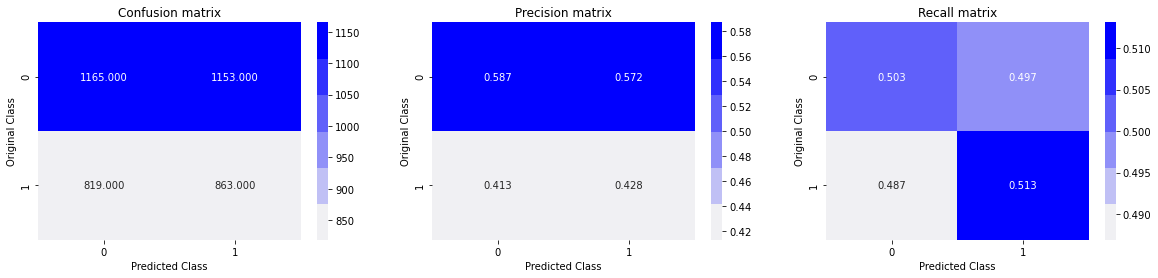

In [318]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h1>Logistic Regression</h1>

For values of alpha =  1e-05 The log loss is: 0.6690553641994436
For values of alpha =  0.0001 The log loss is: 0.6205418275447876
For values of alpha =  0.001 The log loss is: 0.6186675175842276
For values of alpha =  0.01 The log loss is: 0.6096865228208584
For values of alpha =  0.1 The log loss is: 0.6162253680560675
For values of alpha =  1 The log loss is: 0.5937208035979594
For values of alpha =  10 The log loss is: 0.5919300886717818


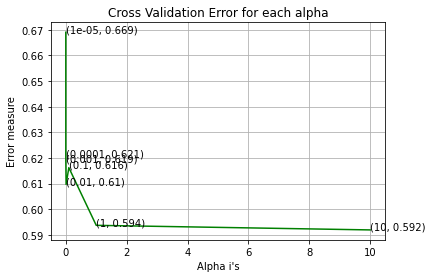

For values of best alpha =  10 The train log loss is: 0.5713353221384544
For values of best alpha =  10 The test log loss is: 0.5919300886717818
Total number of data points : 4000


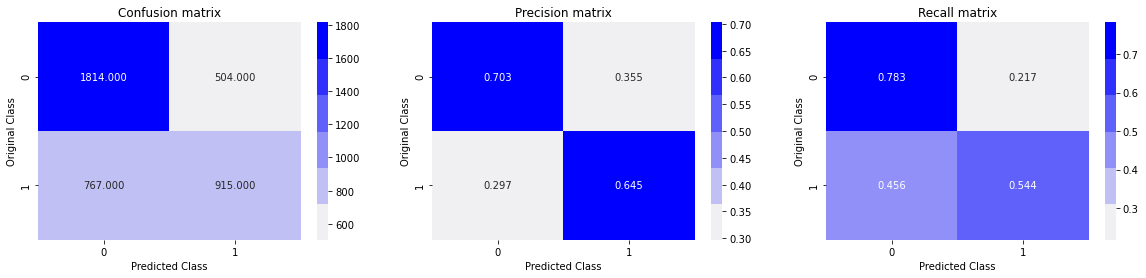

In [319]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>


For values of alpha =  1e-05 The log loss is: 0.6804529565850699
For values of alpha =  0.0001 The log loss is: 0.6126827672471361
For values of alpha =  0.001 The log loss is: 0.6005622056734492
For values of alpha =  0.01 The log loss is: 0.6500011738007315
For values of alpha =  0.1 The log loss is: 0.6573647673009154
For values of alpha =  1 The log loss is: 0.6680007772217024
For values of alpha =  10 The log loss is: 0.6805456461278638


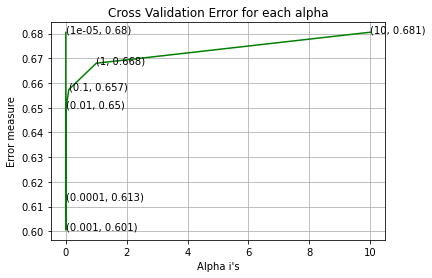

For values of best alpha =  0.001 The train log loss is: 0.5863091312813468
For values of best alpha =  0.001 The test log loss is: 0.6005622056734492
Total number of data points : 4000


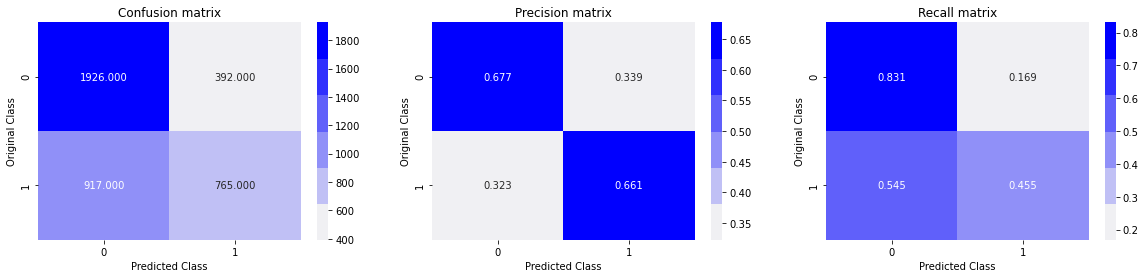

In [320]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [344]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 6

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68801	valid-logloss:0.69072
[10]	train-logloss:0.64183	valid-logloss:0.67061
[20]	train-logloss:0.60403	valid-logloss:0.65586
[30]	train-logloss:0.57152	valid-logloss:0.64455
[40]	train-logloss:0.54228	valid-logloss:0.63500
[50]	train-logloss:0.51690	valid-logloss:0.62820
[60]	train-logloss:0.49392	valid-logloss:0.62211
[70]	train-logloss:0.47299	valid-logloss:0.61729
[80]	train-logloss:0.45423	valid-logloss:0.61258
[90]	train-logloss:0.43766	valid-logloss:0.60893
[100]	train-logloss:0.42232	valid-logloss:0.60577
[110]	train-logloss:0.40874	valid-logloss:0.60301
[120]	train-logloss:0.39603	valid-logloss:0.60102
[130]	train-logloss:0.38436	valid-logloss:0.59898
[140]	train-logloss:0.37343	valid-logloss:0.59738
[150]	train-logloss:0.36292	valid-logloss:0.59582
[160]	train-logloss:0.35316	valid-logloss:0.59434
[170]	train-logloss:0.34452	valid-logloss:0.59370
[180]	train-logloss:0.33597	valid-logloss:0.59232
[190]	train-logloss:0.32715	valid-logloss:0.59212
[200]	train

Total number of data points : 4000


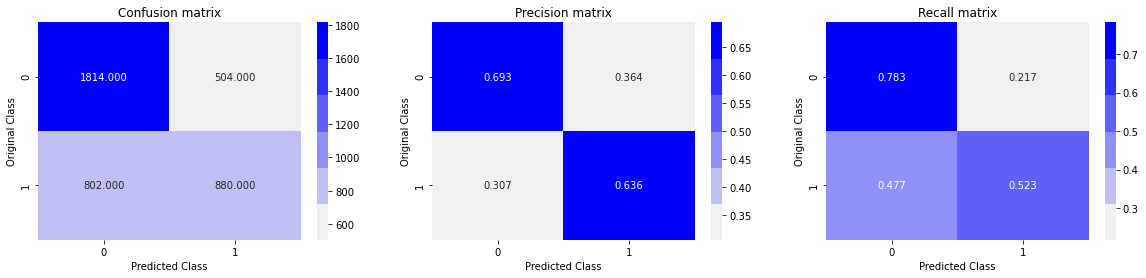

In [323]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1>TEST DATA</h1>

In [326]:
df_test = pd.read_csv("movie_story_evaluation_file.csv")

In [327]:
df_test.head()

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."


In [328]:
df_test.shape

(3498, 2)

In [329]:
def extract_features(df_test):
    # preprocessing each question
    main_dataset["story"] = main_dataset["story"].apply(preprocess)
    return df_test

In [330]:
df_test[df_test.isnull().any(axis=1)]

,movie_id,story


In [331]:
nlp = spacy.load('en_core_web_lg')

vecs3 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu2 in tqdm(list(df_test['story'])):
    doc2 = nlp(qu2) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc2), len(doc2.vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs3.append(mean_vec1)
df_test['q3_feats_m'] = list(vecs3)

100%|██████████| 3498/3498 [00:50<00:00, 69.51it/s]


In [332]:
df_test.head()

,movie_id,story,q3_feats_m
0,122349,Growing up in the Mission district of San Fran...,"[5.143140721134841, 88.9303457736969, -53.9041..."
1,122351,A soldier returns home from the Iraq war only ...,"[0.6342646926641464, 10.967107623815536, -6.64..."
2,122361,Marco the Monkey works as a beach officer. But...,"[3.5663843145594, 61.66655871272087, -37.37853..."
3,187901,"When an honest cop, Vijay Kumar\'s family is r...","[2.7025334453210235, 46.72966334223747, -28.32..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...","[2.3925853027030826, 41.370331436395645, -25.0..."


In [333]:
df_test = pd.DataFrame(df_test.q3_feats_m.values.tolist(), index= df_test.index)


In [334]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,5.143141,88.930346,-53.904194,-254.242818,53.677055,68.462354,58.918340,-142.097419,-58.686916,766.821202,...,69.276617,-28.600766,-126.664998,9.690584,-120.575163,27.213518,60.079735,59.445468,-154.491352,-14.999577
1,0.634265,10.967108,-6.647597,-31.353845,6.619586,8.442945,7.265954,-17.523801,-7.237414,94.566266,...,8.543362,-3.527116,-15.620637,1.195066,-14.869624,3.356038,7.409180,7.330960,-19.052251,-1.849784
2,3.566384,61.666559,-37.378536,-176.298421,37.221033,47.473534,40.855472,-98.533956,-40.694997,531.733285,...,48.038165,-19.832497,-87.832725,6.719697,-83.609879,18.870544,41.660813,41.220996,-107.128225,-10.401087
3,2.702533,46.729663,-28.324694,-133.595357,28.205341,35.974478,30.959445,-74.667026,-30.837841,402.936663,...,36.402344,-15.028663,-66.557851,5.092049,-63.357864,14.299715,31.569717,31.236432,-81.179589,-7.881732
4,2.392585,41.370331,-25.076192,-118.273573,24.970527,31.848637,27.408769,-66.103615,-27.301111,356.724664,...,32.227432,-13.305055,-58.924465,4.508052,-56.091478,12.659709,27.949049,27.653989,-71.869264,-6.977792


In [335]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1418,0.457546,-4.212306,-6.386422,28.697350,13.403630,1.395038,-1.067874,7.893560,-1.780230,252.409394,...,-1.310975,3.427771,20.111977,-5.694506,-5.193867,0.573137,11.007998,15.022615,-6.677865,2.166741
4769,-22.819312,31.901458,-15.676495,-14.281679,32.230969,-8.745896,23.965396,-12.826515,23.155962,949.133206,...,-25.213359,50.800504,33.003413,-4.048474,30.646925,-7.880208,-7.038856,0.009849,-53.247430,-36.860211
10264,-17.895409,3.377344,12.215369,-0.257617,4.921604,-19.780254,0.571816,-20.883696,-6.292312,213.630780,...,10.607683,-7.537562,5.618454,10.665765,7.764808,-1.902508,-1.167162,1.693672,-29.497768,2.561476
5933,-6.908670,17.235869,-3.870385,-2.248787,2.484649,-7.656067,-4.500116,5.520221,7.895440,199.109720,...,-26.564453,6.510677,7.729630,-2.766146,-4.065344,-4.892576,-10.673018,-10.795008,15.296083,2.030295
12569,-8.641678,5.065167,-21.236295,-7.269930,-2.126231,10.532265,-14.461343,15.512101,12.009563,196.900852,...,-11.807508,8.528669,-2.870163,12.564694,3.678123,-3.916090,-7.702979,-0.238627,-2.493929,-5.796786


In [336]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, loss='log',
                                                    random_state=42))

In [341]:
y_test_hat = y_test[:3498]
y_test_hat.shape

print(y_test.shape)
print(y_test_hat.shape)

(4000,)
(3498,)


[[0.84428742 0.15571258]
 [0.53709822 0.46290178]
 [0.77410825 0.22589175]
 ...
 [0.84064397 0.15935603]
 [0.78374382 0.21625618]
 [0.87555909 0.12444091]]
For values of best alpha =  0.001 The test log loss is: 0.7159863967948253
Total number of data points : 3498


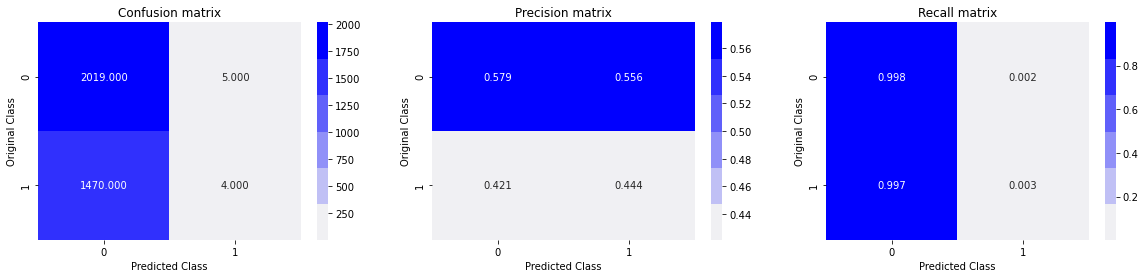

In [342]:
predict_y = sig_clf.predict_proba(df_test)
print(predict_y)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_hat,predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_hat, predicted_y)

In [355]:
df_eval = pd.read_csv("movie_story_evaluation_file.csv")
df_movie2 = pd.read_csv('movies.csv')

print("Number of data points in story df:",df_eval.shape[0])
print("Number of data points in movie genre df:",df_movie.shape[0])

Number of data points in story df: 3498
Number of data points in movie genre df: 23498


In [356]:
df_eval.head()

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."


In [357]:
df_movie2.head()

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller


In [358]:
x_eval = df_eval.rename(columns={"movie_id": "id"})

In [359]:
y_eval = df_movie2.rename(columns={"movieId": "id"})

In [362]:
x_eval.head()

,id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."


In [360]:
cd_eval = pd.merge(x_eval, y_eval, how='inner', left_on = 'id', right_on = 'id')

In [361]:
cd_eval.head()

,id,story,title,genres
0,122349,Growing up in the Mission district of San Fran...,La Mission (2009),Drama
1,122351,A soldier returns home from the Iraq war only ...,Stir of Echoes: The Homecoming (2007),Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Primates of the Caribbean (2012),Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Theri (2016),Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Kaththi (2014),Action|Drama|Romance


In [363]:
cd_eval.shape

(3498, 4)

In [364]:
cd_eval['DramaGenre'] = cd_eval['genres'].str.get_dummies()['Drama']
cd_eval.head()

,id,story,title,genres,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,La Mission (2009),Drama,1
1,122351,A soldier returns home from the Iraq war only ...,Stir of Echoes: The Homecoming (2007),Horror|Thriller,0
2,122361,Marco the Monkey works as a beach officer. But...,Primates of the Caribbean (2012),Animation|Children|Comedy,0
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Theri (2016),Action|Romance,0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Kaththi (2014),Action|Drama|Romance,1


In [365]:
evaluation_dataset = cd_eval.drop(columns=['title', 'genres'], axis=1)
evaluation_dataset['DramaGenre'].value_counts()
evaluation_dataset.rename({'index': 'movie_id', 'DramaGenre': 'Drama'}, inplace=True)
evaluation_dataset

,id,story,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,1
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer. But...,0
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",1
...,...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap...",1
3494,131064,After living for years as a struggling artist ...,0
3495,131066,Ronal is a young barbarian with low self-estee...,0
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",0


In [366]:
def extract_features(df):
    # preprocessing each question
    evaluation_dataset_dataset["story"] = evaluation_dataset["story"].fillna("").apply(preprocess)
    return evaluation_dataset

In [368]:
evaluation_dataset_drama = evaluation_dataset[evaluation_dataset['DramaGenre'] == 1]
evaluation_dataset_nondrama = evaluation_dataset[evaluation_dataset['DramaGenre'] == 0]


# Converting 2d array of q1 and q2 and flatten the array: like {{1,21},{3,4}} to {1,2,3,4}
p = evaluation_dataset_drama["story"].to_numpy().flatten()
n = evaluation_dataset_nondrama["story"].to_numpy().flatten()

print ("Number of data points in class 1  :",len(p))
print ("Number of data points in class 0  :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1  : 1423
Number of data points in class 0  : 2075


In [370]:
nlp = spacy.load('en_core_web_lg')

vecs3 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu2 in tqdm(list(evaluation_dataset['story'])):
    doc2 = nlp(qu2) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc2), len(doc2.vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs3.append(mean_vec1)
evaluation_dataset['q3_feats_m'] = list(vecs3)

100%|██████████| 3498/3498 [00:55<00:00, 62.67it/s]


In [371]:
evaluation_dataset.head()

,id,story,DramaGenre,q3_feats_m
0,122349,Growing up in the Mission district of San Fran...,1,"[5.143140721134841, 88.9303457736969, -53.9041..."
1,122351,A soldier returns home from the Iraq war only ...,0,"[0.6342646926641464, 10.967107623815536, -6.64..."
2,122361,Marco the Monkey works as a beach officer. But...,0,"[3.5663843145594, 61.66655871272087, -37.37853..."
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",0,"[2.7025334453210235, 46.72966334223747, -28.32..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",1,"[2.3925853027030826, 41.370331436395645, -25.0..."


In [375]:
df_evaluation = pd.DataFrame(evaluation_dataset.q3_feats_m.values.tolist(), index= df_test.index)

In [373]:
df_evaluation

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,5.143141,88.930346,-53.904194,-254.242818,53.677055,68.462354,58.918340,-142.097419,-58.686916,766.821202,...,69.276617,-28.600766,-126.664998,9.690584,-120.575163,27.213518,60.079735,59.445468,-154.491352,-14.999577
1,0.634265,10.967108,-6.647597,-31.353845,6.619586,8.442945,7.265954,-17.523801,-7.237414,94.566266,...,8.543362,-3.527116,-15.620637,1.195066,-14.869624,3.356038,7.409180,7.330960,-19.052251,-1.849784
2,3.566384,61.666559,-37.378536,-176.298421,37.221033,47.473534,40.855472,-98.533956,-40.694997,531.733285,...,48.038165,-19.832497,-87.832725,6.719697,-83.609879,18.870544,41.660813,41.220996,-107.128225,-10.401087
3,2.702533,46.729663,-28.324694,-133.595357,28.205341,35.974478,30.959445,-74.667026,-30.837841,402.936663,...,36.402344,-15.028663,-66.557851,5.092049,-63.357864,14.299715,31.569717,31.236432,-81.179589,-7.881732
4,2.392585,41.370331,-25.076192,-118.273573,24.970527,31.848637,27.408769,-66.103615,-27.301111,356.724664,...,32.227432,-13.305055,-58.924465,4.508052,-56.091478,12.659709,27.949049,27.653989,-71.869264,-6.977792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,0.775616,13.411225,-8.129073,-38.341328,8.094819,10.324530,8.885236,-21.429136,-8.850336,115.641198,...,10.447326,-4.313166,-19.101835,1.461398,-18.183452,4.103960,9.060381,8.964730,-23.298214,-2.262025
3494,1.966474,34.002417,-20.610208,-97.209454,20.523362,26.176504,22.527361,-54.330788,-22.438876,293.193223,...,26.487837,-10.935471,-48.430219,3.705184,-46.101778,10.405058,22.971419,22.728908,-59.069595,-5.735071
3495,5.038120,87.114424,-52.803493,-249.051282,52.580992,67.064381,57.715252,-139.195848,-57.488554,751.163032,...,67.862018,-28.016750,-124.078551,9.492706,-118.113068,26.657830,58.852932,58.231616,-151.336702,-14.693291
3496,3.741373,64.692299,-39.212557,-184.948706,39.047325,49.802877,42.860093,-103.368639,-42.691744,557.823389,...,50.395213,-20.805601,-92.142339,7.049406,-87.712294,19.796450,43.704949,43.243552,-112.384595,-10.911429


In [377]:
y_test_hat = evaluation_dataset['DramaGenre']

In [378]:
y_test_hat.shape

(3498,)

In [391]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, loss='log',
                                                    random_state=42))

For values of best alpha =  0.001 The train log loss is: 0.6038063857568828
For values of best alpha =  0.001 The test log loss is: 0.7150059369292459
Total number of data points : 3498


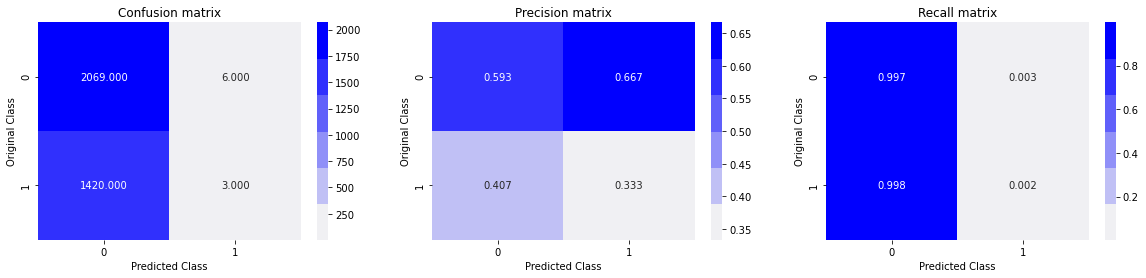

In [392]:
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(df_evaluation)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_hat, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_hat, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.6690553641994436
For values of alpha =  0.0001 The log loss is: 0.6205418275447876
For values of alpha =  0.001 The log loss is: 0.6186675175842276
For values of alpha =  0.01 The log loss is: 0.6096865228208584
For values of alpha =  0.1 The log loss is: 0.6162253680560675
For values of alpha =  1 The log loss is: 0.5937208035979594
For values of alpha =  10 The log loss is: 0.5919300886717818


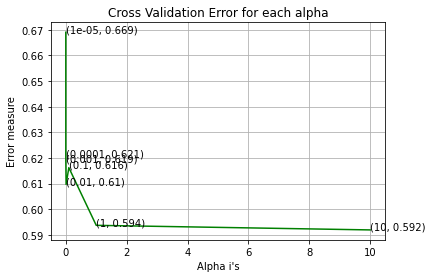

For values of best alpha =  10 The train log loss is: 0.5713353221384544
For values of best alpha =  10 The test log loss is: 0.7950390480529896
Total number of data points : 3498


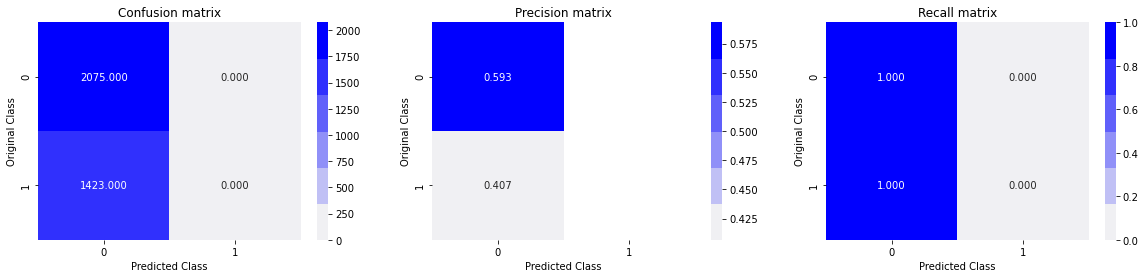

In [394]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(df_evaluation)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_hat, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_hat, predicted_y)

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be identified by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: May 3 2022 at 6:59 PM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>